In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img1 = cv.imread('./doctor.PNG')
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

#keypoints
sift = cv.SIFT_create()
kp1, dp1 = sift.detectAndCompute(gray1, None)
#drawkeypoints
img1=cv.drawKeypoints(gray1,kp1,img1,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg', img1)
cv.imshow("OpenCV", img1);
cv.waitKey()

-1

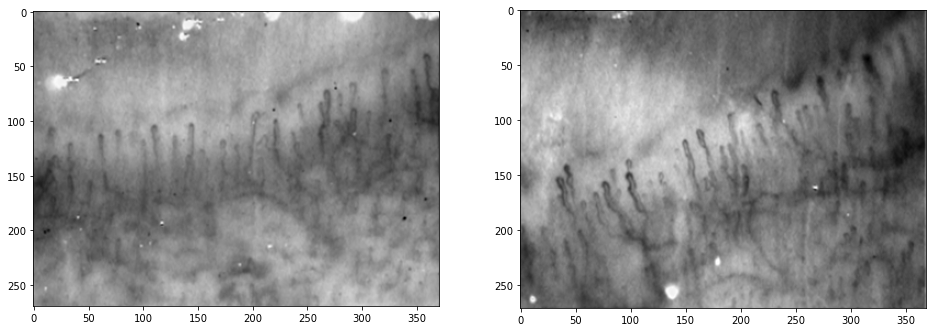

In [1]:
import cv2 
import matplotlib.pyplot as plt


# read images
img1 = cv2.imread('./nsm1.PNG')  
img2 = cv2.imread('./sm2.PNG') 


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [3]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

NameError: name 'cv2' is not defined

In [4]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
#matches = sorted(matches, key = lambda x:x.distance)

# img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:500], img2, flags=2)
# plt.imshow(img3),plt.show()
# cv.imshow("OpenCV", img3);
# cv.waitKey()

The number of good match 248
The score of SIFT is 1.95% 


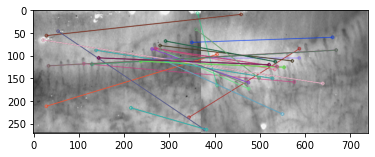

-1

In [6]:
good = []
for n in matches:
    for m in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

number_keypoints = 0
if len(keypoints_1) <= len(keypoints_2):
    number_keypoints = len(keypoints_1)
else:
    number_keypoints = len(keypoints_2)
print("The number of good match",len(good))
print('The score of SIFT is {:.2f}% '.format(len(good)/number_keypoints)) 
img3 = cv2.drawMatchesKnn(img1, keypoints_1, img2, keypoints_2, good , img2, flags=2)
plt.imshow(img3),plt.show()
cv2.imshow("Match image",img3)
cv2.waitKey()

In [78]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2 

In [66]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	#m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
    
	plt.suptitle(" SSIM: %.2f" % (s))
    fig.tight_layout()
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

In [62]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
smoke1 = cv2.imread("./smoke/0050.jpg")
smoke2 = cv2.imread("./smoke/0215.jpg")
nsmoke1 = cv2.imread("./no-smoke/2423.jpg")
nsmoke2 = cv2.imread("./no-smoke/2430.jpg")
# convert the images to grayscale
smoke1 = cv2.cvtColor(smoke1, cv2.COLOR_BGR2GRAY)
smoke2 = cv2.cvtColor(smoke2, cv2.COLOR_BGR2GRAY)
nsmoke1 = cv2.cvtColor(nsmoke1, cv2.COLOR_BGR2GRAY)
nsmoke2 = cv2.cvtColor(nsmoke2, cv2.COLOR_BGR2GRAY)

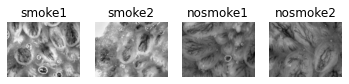

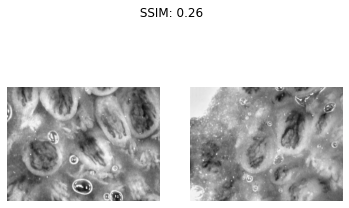

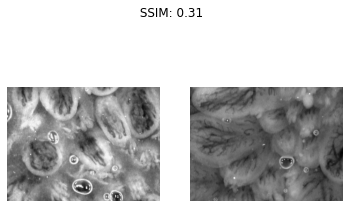

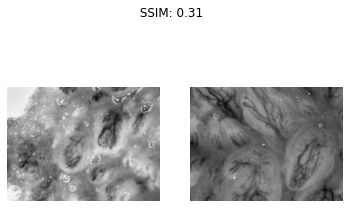

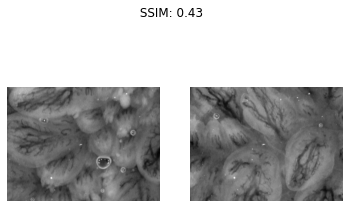

In [63]:
# initialize the figure
fig = plt.figure("Images")
images = ("smoke1", smoke1), ("smoke2", smoke2), ("nosmoke1", nsmoke1), ("nosmoke2", nsmoke2)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 4, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(smoke1, smoke2, "smoke1 vs. smoke2")
compare_images(smoke1, nsmoke1, "smoke1 vs. nsmoke1")
compare_images(smoke2, nsmoke2, "smoke2 vs. nsmoke2")
compare_images(nsmoke1, nsmoke2, "nsmoke1 vs. snmoke2") 